# 反向传播算法示例
神经网络就是一种映射，将原数据映射成期望获得的数据。BP算法就是其中的一种映射
## 导包

In [1]:
# 导包
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_moons # 月亮集
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy.special import expit
X,Y = make_moons(n_samples=2000,noise=0.4, random_state=None)

F:\Anaconda\path\envs\ptG38\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## 绘图

X:(2000, 2), Y:(2000,)


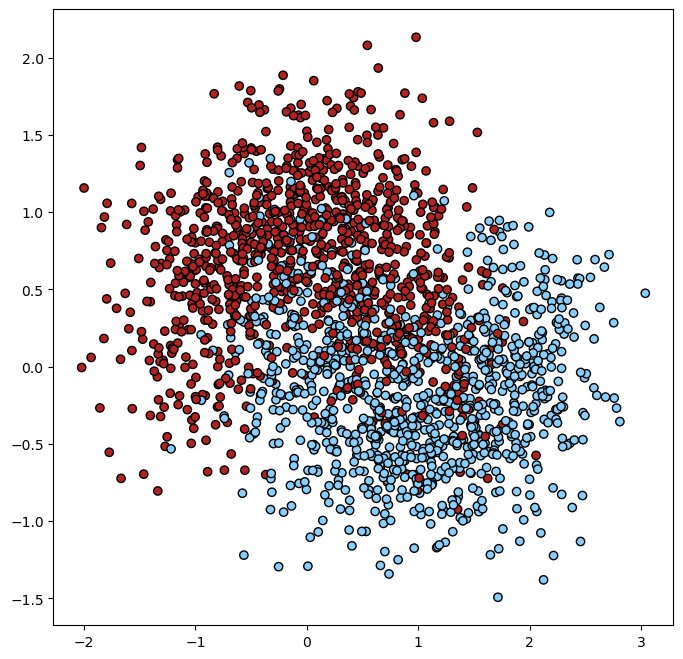

In [2]:
# 绘图
print(f'X:{X.shape}, Y:{Y.shape}')
plt.figure(figsize=(8,8),dpi=100)
plt.scatter(X[:,0],X[:,1], c=Y, cmap=ListedColormap(['#B22222', '#87CEFA']),edgecolors='k')

## 初始化数据
fit_transform 标准化：把数据的均值调整到0，把数据的标准差调整到1。

具体做了2件事
+ fit()：计算 每个特征的均值（mean）和标准差（std）
+ transform()：用上面算出来的均值和标准差，把数据按公式 （x - mean）/ std 进行标准化

In [3]:
# 生成数据
trainX, testX, trainY, testY = train_test_split(X,Y,test_size=0.2, random_state=32)
print(trainX.shape, trainY, testX.shape, testY.shape)
# 初始化一个标准化器的实例
sta = StandardScaler()
# 对训练集进行标准化，它会计算训练集的均值和标准差保存起来
trainX = sta.fit_transform(trainX)
# 使用标准化器在训练集上的均值和标准差，对测试集进行归一化
testX = sta.transform(testX)

(1600, 2) [0 0 1 ... 0 0 0] (400, 2) (400,)


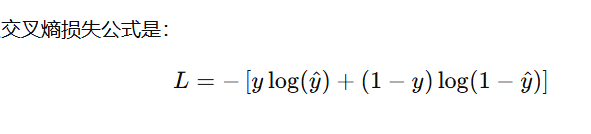

2层的神经网络

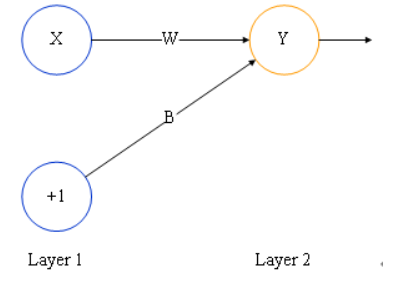

In [4]:
def _init_(q):
    np.random.seed(9)
    W = np.random.normal(size = (q,))
    B = np.zeros(1,) # 偏置项
    return W, B

# 激活函数
def sigmoid(x):
    return expit(x)

# 前向传播
def forward(X,W,B):
    preY = sigmoid(np.dot(X,W) + B)
    return preY

# 损失函数
def lossFn(preY, Y):
    return -np.mean(Y*np.log(preY) + (1-Y)*np.log(1-preY))

# 反向传播
def backward(W,B,X,Y,preY,learn_rate):
    # 梯度
    dW = np.dot(X.T, preY - Y) / len(Y)
    dB = np.sum(preY - Y) / len(Y)
    # 更新参数(直接修改X、Y)
    W -= learn_rate *dW
    B -= learn_rate *dB
    return W,B

# 训练、更新W和B
def train(trainX, trainY, testX, testY, W, B, epochs):
    '''
    维度：
    trainX p,q
    trainY p,
    testX m,q
    testY m
    W q,
    B 1, 或p,
    '''
    learn_rate = 0.05 # 学习率
    train_loss_list = []
    test_loss_list = []
    for i in range(epochs):
        pre_trainY = forward(trainX,W,B)
        train_loss = lossFn(pre_trainY, trainY)

        pre_testY = forward(testX, W,B)
        test_loss = lossFn(pre_testY, testY)

        train_loss_list.append(train_loss)
        test_loss_list.append(test_loss)

        backward(W,B,trainX,trainY, pre_trainY, learn_rate)
    return train_loss_list, test_loss_list

# 预测
def predict(X,W,B):
    preY = forward(X,W,B)
    preY_len = len(preY)
    preList = np.zeros(preY_len)

    for i in range(preY_len):
        if preY[i] > 0.5:
            preList[i] = 1
        else:
            preList[i] = 0
    return preList

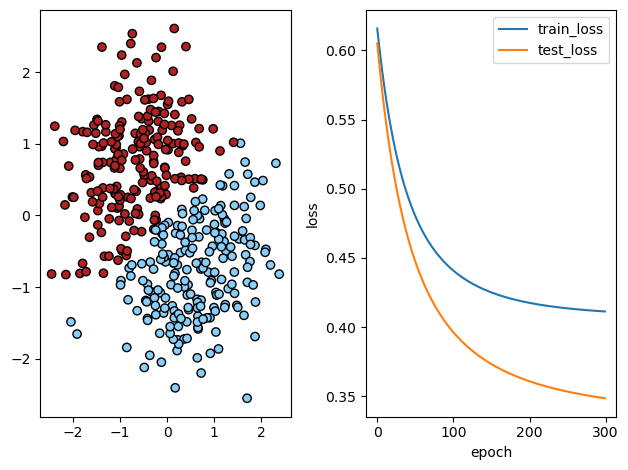

In [5]:
W,B = _init_(trainX.shape[1])
train_loss_list, test_loss_list = train(trainX, trainY, testX, testY, W, B, epochs=300)
preList = predict(testX,W,B)
# 画图
fig = plt.figure(dpi=100)
ax = fig.add_subplot(1,2,1)
# 测试集
ax.scatter(testX[:,0], testX[:,1], c=preList,cmap=ListedColormap(['#B22222', '#87CEFA']), edgecolors='k')
# 损失函数
ax2 = fig.add_subplot(1,2,2)
ax2.plot(train_loss_list, label='train_loss')
ax2.plot(test_loss_list, label='test_loss')
ax2.set_xlabel('epoch')
ax2.set_ylabel('loss')
plt.tight_layout()
plt.legend()
plt.show()